<a href="https://colab.research.google.com/github/2wnh93/motor-insurance-pdp/blob/main/code/02_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Modelling

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

#for modelling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.inspection.partial_dependence import partial_dependence
# from sklearn.inspection import plot_partial_dependence, PartialDependenceDisplay
from pdpbox import pdp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# read data
from google.colab import files
uploaded = files.upload()

Saving auto_clean.csv to auto_clean.csv


In [6]:
import io
auto = pd.read_csv(io.BytesIO(uploaded['auto_clean.csv']))

In [7]:
# preview 
print("==================== Top 5 rows of dataset ====================")
display(auto.head())
print("==================== Shape of dataset ====================")
print(auto.shape)
print("==================== Data types in dataset ====================")
print(auto.dtypes)

==================== Top 5 rows of dataset ====================


,claimnb,exposure,vehpower,vehage,drivage,bonusmalus,density,area_'A',area_'B',area_'C',area_'D',area_'E',area_'F',vehbrand_'B1',vehbrand_'B10',vehbrand_'B11',vehbrand_'B12',vehbrand_'B13',vehbrand_'B14',vehbrand_'B2',vehbrand_'B3',vehbrand_'B4',vehbrand_'B5',vehbrand_'B6',vehgas_'Diesel',vehgas_'Regular',region_'R11',region_'R21',region_'R22',region_'R23',region_'R24',region_'R25',region_'R26',region_'R31',region_'R41',region_'R42',region_'R43',region_'R52',region_'R53',region_'R54',region_'R72',region_'R73',region_'R74',region_'R82',region_'R83',region_'R91',region_'R93',region_'R94',claimfreq
0,1,0.10,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.000000
1,1,0.77,2,0,55,50,1217,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.298701
2,1,0.75,3,2,52,50,54,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.333333
3,1,0.09,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,11.111111
4,1,0.84,4,0,46,50,76,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.190476


==================== Shape of dataset ====================
(668502, 49)
==================== Data types in dataset ====================
claimnb               int64
exposure            float64
vehpower              int64
vehage                int64
drivage               int64
bonusmalus            int64
density               int64
area_'A'              int64
area_'B'              int64
area_'C'              int64
area_'D'              int64
area_'E'              int64
area_'F'              int64
vehbrand_'B1'         int64
vehbrand_'B10'        int64
vehbrand_'B11'        int64
vehbrand_'B12'        int64
vehbrand_'B13'        int64
vehbrand_'B14'        int64
vehbrand_'B2'         int64
vehbrand_'B3'         int64
vehbrand_'B4'         int64
vehbrand_'B5'         int64
vehbrand_'B6'         int64
vehgas_'Diesel'       int64
vehgas_'Regular'      int64
region_'R11'          int64
region_'R21'          int64
region_'R22'          int64
region_'R23'          int64
region_'R24'          in

In [8]:
# prep features and target variable 
features = [col for col in auto.columns if col != 'claimfreq']
X = auto[features]
y = auto['claimfreq']

In [9]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [10]:
%%time
#instantiate model
rfr = RandomForestRegressor(n_estimators = 30, random_state=1)

#fit model
rfr.fit(X_train,y_train)

CPU times: user 14.7 s, sys: 155 ms, total: 14.8 s
Wall time: 14.8 s


## Partial Dependence Plots (PDP) 

Recap of features in the dataset

Numerical : 
- claimnb
- exposure
- vehage
- drivage
- bonusmalus
- density

Ordinal category :
- vehpower

Prediction : 
- claimfreq

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


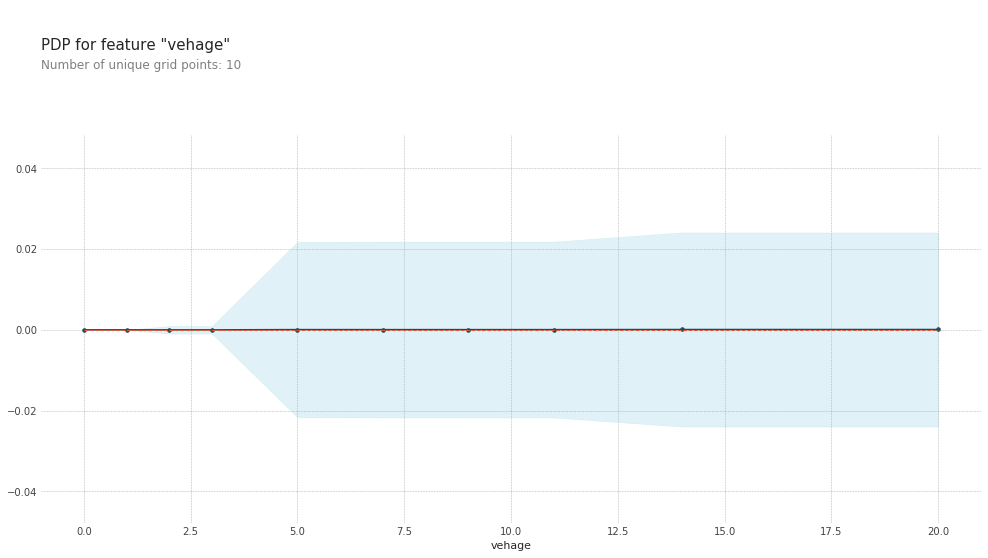

In [11]:
feat_name = 'vehage'
pdp_dist = pdp.pdp_isolate(model=rfr, 
                           dataset=X_test, 
                           model_features=features, 
                           feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

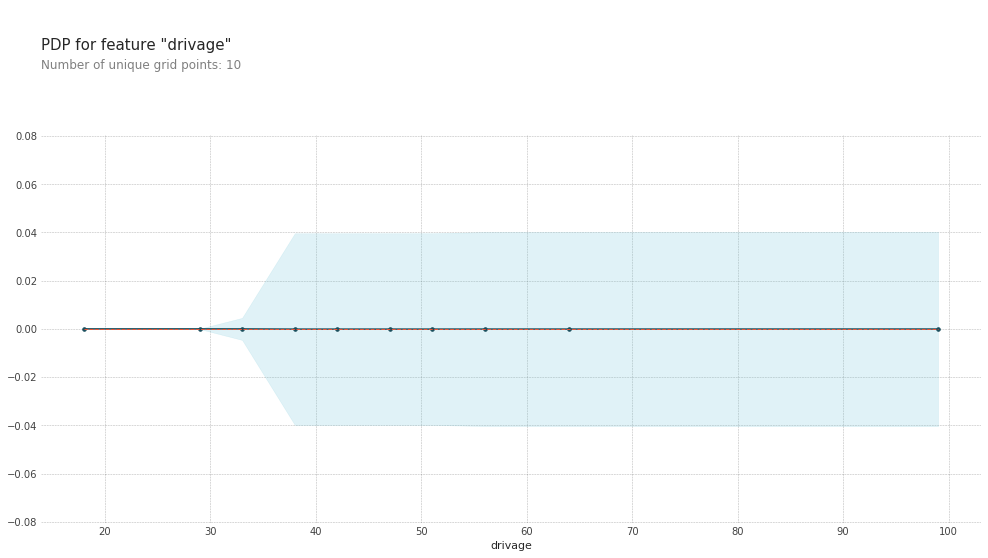

In [12]:
feat_name = 'drivage'
pdp_dist = pdp.pdp_isolate(model=rfr, 
                           dataset=X_test, 
                           model_features=features, 
                           feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

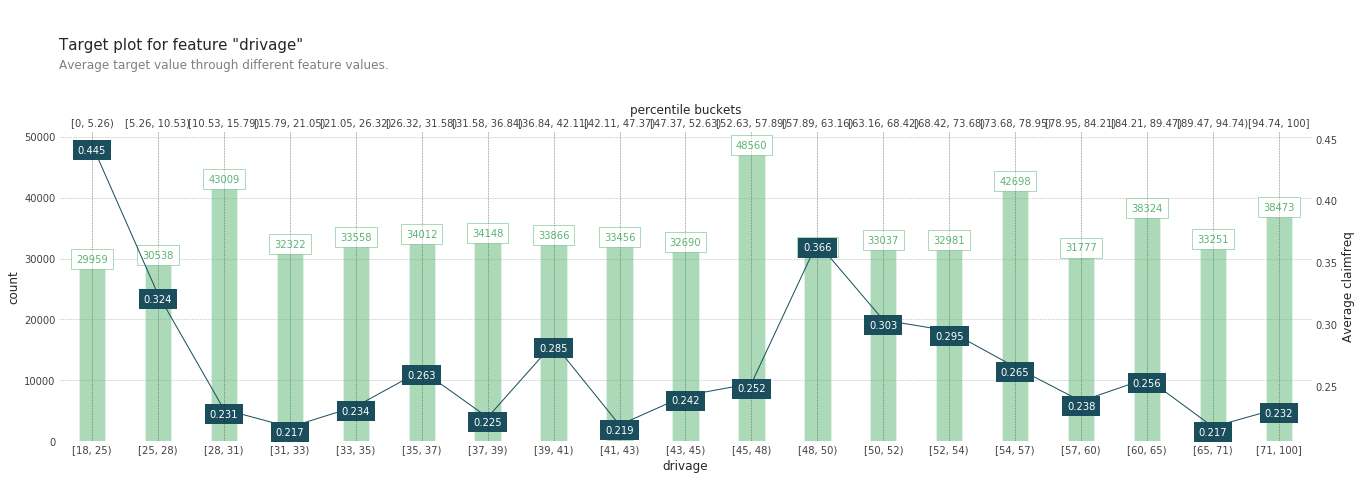

In [13]:
from pdpbox import pdp, info_plots
#first plot target plot

feature_to_be_analysed = 'drivage'
feature_name = 'drivage'
target_feature = 'claimfreq'

fig, axes, summary_df = info_plots.target_plot(df=auto,
                                               feature=feature_to_be_analysed,
                                               feature_name=feature_name,
                                               target= target_feature,
                                               num_grid_points = 20,
                                               show_percentile=True,figsize= (20,8))

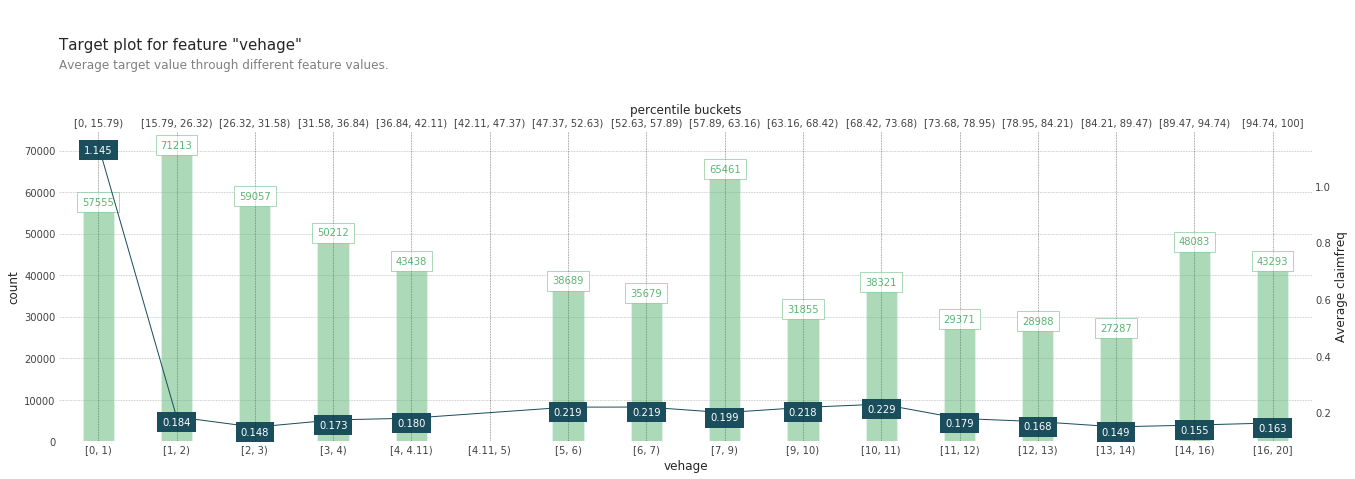

In [15]:
feature_to_be_analysed = 'vehage'
feature_name = 'vehage'
target_feature = 'claimfreq'

fig, axes, summary_df = info_plots.target_plot(df=auto,
                                               feature=feature_to_be_analysed,
                                               feature_name=feature_name,
                                               target= target_feature,
                                               num_grid_points = 20,
                                               show_percentile=True,figsize= (20,8))

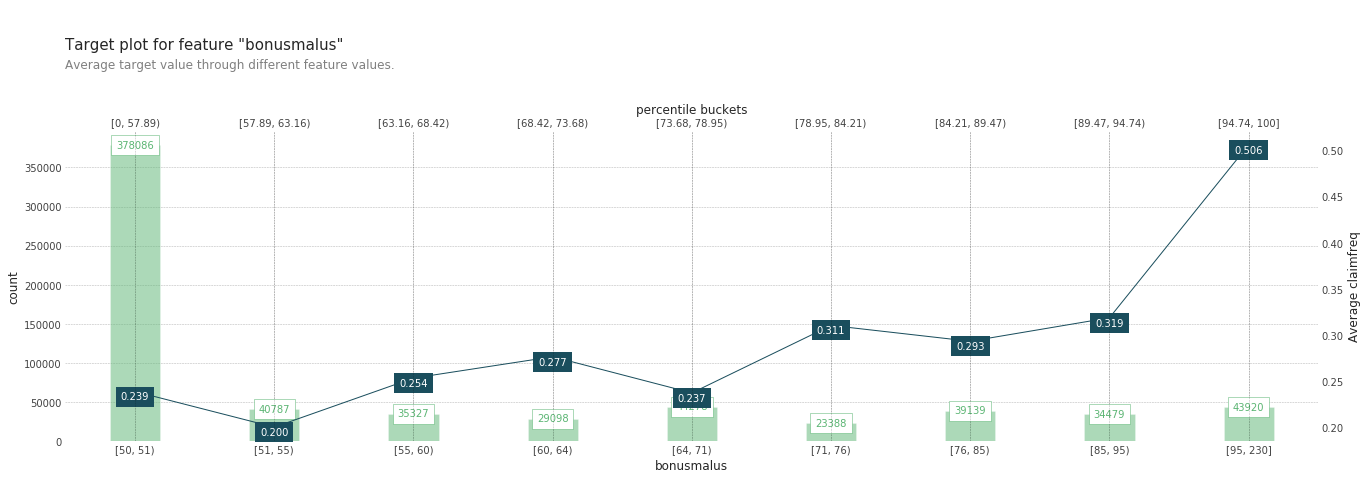

In [16]:
feature_to_be_analysed = 'bonusmalus'
feature_name = 'bonusmalus'
target_feature = 'claimfreq'

fig, axes, summary_df = info_plots.target_plot(df=auto,
                                               feature=feature_to_be_analysed,
                                               feature_name=feature_name,
                                               target= target_feature,
                                               num_grid_points = 20,
                                               show_percentile=True,figsize= (20,8))

## References
How to import data into google colab :
https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92